# **Import Library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# **Load Data**

In [ ]:
# Load dataset
data = pd.read_csv('alzheimers_disease_data.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

# **Pre-Prosessing Data**

In [ ]:
# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

Missing values per column:
PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCo

In [ ]:
# Menghilangkan nilai yang hilang
data = data.dropna()

In [ ]:
# Menghilangkan data duplikat
data = data.drop_duplicates()
print(data.describe())

         PatientID          Age       Gender    Ethnicity  EducationLevel  \
count  2149.000000  2149.000000  2149.000000  2149.000000     2149.000000   
mean   5825.000000    74.908795     0.506282     0.697534        1.286645   
std     620.507185     8.990221     0.500077     0.996128        0.904527   
min    4751.000000    60.000000     0.000000     0.000000        0.000000   
25%    5288.000000    67.000000     0.000000     0.000000        1.000000   
50%    5825.000000    75.000000     1.000000     0.000000        1.000000   
75%    6362.000000    83.000000     1.000000     1.000000        2.000000   
max    6899.000000    90.000000     1.000000     3.000000        3.000000   

               BMI      Smoking  AlcoholConsumption  PhysicalActivity  \
count  2149.000000  2149.000000         2149.000000       2149.000000   
mean     27.655697     0.288506           10.039442          4.920202   
std       7.217438     0.453173            5.757910          2.857191   
min      15.00

In [ ]:
# Asumsikan kolom terakhir adalah label
X = data.drop(columns=['PatientID', 'DoctorInCharge', 'Diagnosis'])
y = pd.get_dummies(data['Diagnosis'], drop_first=True)  # One-hot encoding jika diagnosisnya kategorikal

# **Pembagian Data**

In [ ]:
# Membagi data dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standarisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **ANN**

In [ ]:
# Definisikan model ANN
model = Sequential()

In [ ]:
# Input layer + hidden layer pertama
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.3))  # Menambahkan dropout untuk mencegah overfitting

In [ ]:
# Hidden layer kedua
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

In [ ]:
# Output layer
model.add(Dense(units=1, activation='sigmoid'))  # Output 1 neuron untuk klasifikasi biner

In [ ]:
# Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Early stopping untuk menghindari overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
# Latih model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=100, batch_size=32, callbacks=[early_stopping], verbose=1)

Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.5835 - loss: 0.6717 - val_accuracy: 0.6791 - val_loss: 0.5801
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6974 - loss: 0.5797 - val_accuracy: 0.7698 - val_loss: 0.5075
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7516 - loss: 0.5238 - val_accuracy: 0.7884 - val_loss: 0.4468
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7997 - loss: 0.4524 - val_accuracy: 0.8000 - val_loss: 0.4170
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8047 - loss: 0.4437 - val_accuracy: 0.8279 - val_loss: 0.4037
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8217 - loss: 0.4004 - val_accuracy: 0.8209 - val_loss: 0.3980
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8274 - loss: 0.4087 - val_accuracy: 0.8256 - val_loss: 0.3962
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8371 - loss: 0.3730 - val_accuracy: 0.82

# **Evaluasi Model**

In [ ]:
# Hasil prediksi
y_pred = (model.predict(X_test) > 0.5).astype("int32")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [ ]:
# Tampilkan Classification Report dan Accuracy
print("Classification Report ANN")
print(classification_report(y_test, y_pred))
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Classification Report ANN
              precision    recall  f1-score   support

       False       0.85      0.91      0.88       277
        True       0.81      0.71      0.76       153

    accuracy                           0.84       430
   macro avg       0.83      0.81      0.82       430
weighted avg       0.84      0.84      0.83       430

Model accuracy score: 0.8372


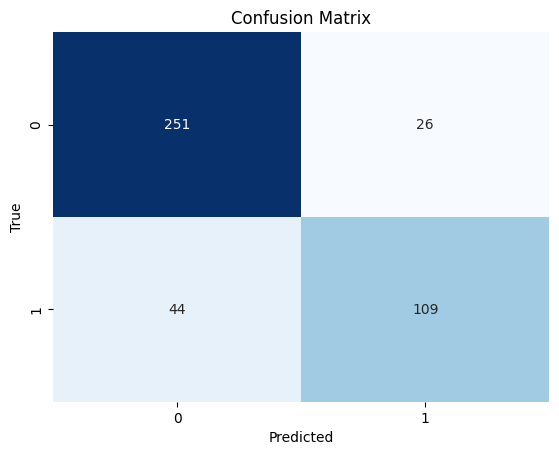

In [ ]:
# Tampilkan Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_pred, "Confusion Matrix")

# **Plot Akurasi dan Loss**

In [ ]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

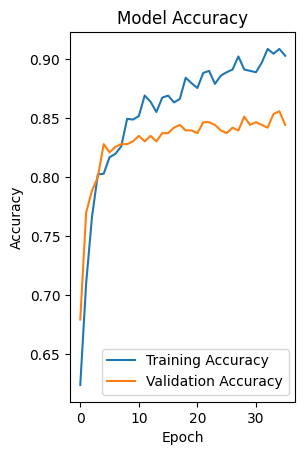

In [ ]:
# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

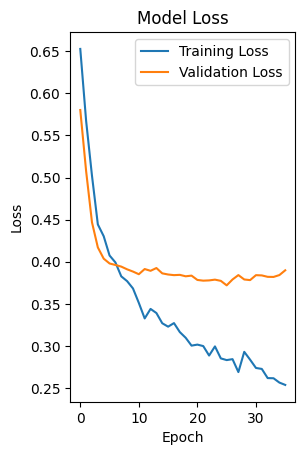

In [ ]:
# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()